# Feature Engineering

In this notebook, we are going to attempt to add additional variables to our dataset that might better explain lightning. Note that these variables are all assumptions. Lightning is a very complicated weather phenomenon that probably does not have one exact set of characteristics which causes it. We will still try our best to add more nuance to our dataset; this is also just a fun task altogether.

Features we would like to add: 

1. Edge of Storm
    When a pixel is at the front of the storm, we would expect there to be a higher probability of lightning. 

2. Neighbor Based Variance
    A pixel whose nearby neighbors have a higher variance/standard deviation of ABI weather data should have a higher probability of lightning. 

3. Interaction Effects
    In general, we would expect "cloud probability" to be the most important variable. It is significantly harder for there to be lightning in an environment without any clouds. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# Read in the data 
df = pd.read_csv("/Users/robbiefeldstein/Documents/Programming/Research/Datasets/group_May_22.csv")
df.head()

,Unnamed: 0,Coordinates,nearest_time,lightning,CMI_C01,CMI_C02,CMI_C03,CMI_C04,CMI_C05,CMI_C06,...,CMI_C15,CMI_C16,ACM,BCM,Cloud_Probabilities,lat,lon,time,time_int,Lightning
0,0,"(40.13103323474366, -93.38155072424266)",0,0.0,0.331051,0.283293,0.454821,0.001786,0.371012,0.296587,...,274.79310,263.45618,1.734227,0.734227,0.505974,40.131033,-93.381551,2022-05-21 19:00:31.268224,1653159631268224000,0
1,1,"(40.12698592712501, -93.2741436595977)",0,0.0,0.296647,0.242758,0.444345,0.001746,0.330734,0.259226,...,275.39243,263.77637,1.375754,0.500453,0.446567,40.126986,-93.274144,2022-05-21 19:00:31.268224,1653159631268224000,0
2,2,"(40.122965705716815, -93.16685328500078)",0,0.0,0.301825,0.247361,0.450753,0.001825,0.329881,0.260476,...,275.28073,263.76944,1.593902,0.593902,0.484379,40.122966,-93.166853,2022-05-21 19:00:31.268224,1653159631268224000,0
3,3,"(40.11897247748837, -93.05967862352706)",0,0.0,0.344345,0.293075,0.490972,0.002063,0.365119,0.283512,...,275.14670,263.74536,1.828127,0.828127,0.638011,40.118972,-93.059679,2022-05-21 19:00:31.268224,1653159631268224000,0
4,4,"(40.115006150366405, -92.95261870531907)",0,0.0,0.335952,0.285119,0.485000,0.002103,0.361805,0.283472,...,275.35516,263.82800,1.796349,0.811898,0.613374,40.115006,-92.952619,2022-05-21 19:00:31.268224,1653159631268224000,0


# Neighbor Based Variance

We will start by trying to determine pixels whose neighbors have high variance in CMI data. "High Variance" is a relatively defined term, and we will not know what is a high variance until we start investigating the data.

In [10]:
# Start by creating a column that measures the variance of the Satellite Data

# Assume that being "far" from the mean means higher likelihood of lightning 

#This is a lot of code, but it runs so much faster than a for loop
df["Variance Measure"] = (df["CMI_C01"] - df["CMI_C01"].mean()) ** 2 + (df["CMI_C02"] - df["CMI_C02"].mean()) ** 2 + (df["CMI_C03"] - df["CMI_C03"].mean()) ** 2 + (df["CMI_C04"] - df["CMI_C04"].mean()) ** 2 + (df["CMI_C05"] - df["CMI_C05"].mean()) ** 2 + (df["CMI_C06"] - df["CMI_C06"].mean()) ** 2 + (df["CMI_C07"] - df["CMI_C07"].mean()) ** 2 + (df["CMI_C08"] - df["CMI_C08"].mean()) ** 2 + (df["CMI_C09"] - df["CMI_C09"].mean()) ** 2 + (df["CMI_C10"] - df["CMI_C10"].mean()) ** 2 + (df["CMI_C11"] - df["CMI_C11"].mean()) ** 2 + (df["CMI_C12"] - df["CMI_C12"].mean()) ** 2 + (df["CMI_C13"] - df["CMI_C13"].mean()) ** 2 + (df["CMI_C14"] - df["CMI_C14"].mean()) ** 2 + (df["CMI_C15"] - df["CMI_C15"].mean()) ** 2 + (df["CMI_C16"] - df["CMI_C16"].mean()) ** 2
df.head()



,Unnamed: 0,Coordinates,nearest_time,lightning,CMI_C01,CMI_C02,CMI_C03,CMI_C04,CMI_C05,CMI_C06,...,CMI_C16,ACM,BCM,Cloud_Probabilities,lat,lon,time,time_int,Lightning,Variance Measure
0,0,"(40.13103323474366, -93.38155072424266)",0,0.0,0.331051,0.283293,0.454821,0.001786,0.371012,0.296587,...,263.45618,1.734227,0.734227,0.505974,40.131033,-93.381551,2022-05-21 19:00:31.268224,1653159631268224000,0,4327.927646
1,1,"(40.12698592712501, -93.2741436595977)",0,0.0,0.296647,0.242758,0.444345,0.001746,0.330734,0.259226,...,263.77637,1.375754,0.500453,0.446567,40.126986,-93.274144,2022-05-21 19:00:31.268224,1653159631268224000,0,4514.125554
2,2,"(40.122965705716815, -93.16685328500078)",0,0.0,0.301825,0.247361,0.450753,0.001825,0.329881,0.260476,...,263.76944,1.593902,0.593902,0.484379,40.122966,-93.166853,2022-05-21 19:00:31.268224,1653159631268224000,0,4455.731286
3,3,"(40.11897247748837, -93.05967862352706)",0,0.0,0.344345,0.293075,0.490972,0.002063,0.365119,0.283512,...,263.74536,1.828127,0.828127,0.638011,40.118972,-93.059679,2022-05-21 19:00:31.268224,1653159631268224000,0,4344.219833
4,4,"(40.115006150366405, -92.95261870531907)",0,0.0,0.335952,0.285119,0.485000,0.002103,0.361805,0.283472,...,263.82800,1.796349,0.811898,0.613374,40.115006,-92.952619,2022-05-21 19:00:31.268224,1653159631268224000,0,4462.607307


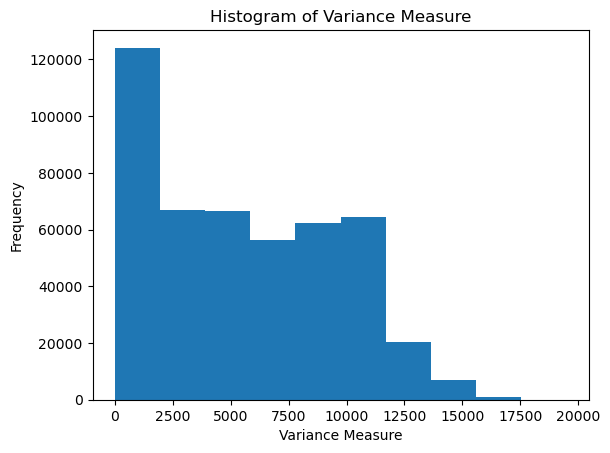

In [13]:
plt.hist(df["Variance Measure"])
plt.title("Histogram of Variance Measure")
plt.xlabel("Variance Measure")
plt.ylabel("Frequency")
plt.show()

Looking at the histogram, it is clear that some cells have extremely high variance, while the majority of them are lower. Maybe, we can add a feature which checcks if the nearby cells are in the 90th percentile of the data. 

In [43]:
# Find the four nearest neighbors of each point at each time interval 
from scipy.spatial import KDTree
coordinates = df[['lat','lon','time_int']].values
kdtree = KDTree(coordinates)
distance,indices = kdtree.query(coordinates,k=15)


#From each of the nearest neighbors, find the average variance measure

def avg_var(index_list):
    var_list = []
    for i in index_list:
        var_list.append(df["Variance Measure"][i])
    return np.mean(var_list)

avg_var_list = [avg_var(i) for i in indices]
df["Avg Variance"] = avg_var_list
df.head()

#If the Avg Variance value is greater than 95% of the other values, then we will say that the point is "far" from the mean
df["Bubbling"] = np.where(df["Avg Variance"] > df["Avg Variance"].quantile(.95), 1, 0)
len(df[df["Bubbling"] == 1])

23438

In [44]:
print(len(df[(df["Bubbling"] == 1) & (df["Lightning"]==1)]))
print(len(df[(df["Bubbling"] == 0) & (df["Lightning"]==1)]))

4338
21224
